<a href="https://colab.research.google.com/github/Amisha312710/breast-cancer-ml-dl-methods-analysis-/blob/main/ml_breastcancer_pbl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [7]:
# print last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [10]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# checking for missing values
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [12]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

,count
label,
1,357
0,212


In [14]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [15]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [16]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [17]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


PHASE 1

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


In [19]:
#Logistic regression assumes features are on comparable scales.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, Y_train)


LogisticRegression(max_iter=1000)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

Y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, log_reg.predict_proba(X_test_scaled)[:,1])

print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)
print(classification_report(Y_test, Y_pred))


Accuracy: 0.9824561403508771
ROC-AUC: 0.9953703703703703
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)

Y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(Y_test, Y_pred_knn))


KNN Accuracy: 0.956140350877193


In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, Y_train)

Y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(Y_test, Y_pred_svm))


SVM Accuracy: 0.9824561403508771


In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)

Y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(Y_test, Y_pred_dt))


Decision Tree Accuracy: 0.9122807017543859


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(Y_test, Y_pred_rf))


Random Forest Accuracy: 0.956140350877193


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

Y_pred_gb = gb.predict(X_test)

print("Gradient Boost Accuracy:", accuracy_score(Y_test, Y_pred_gb))


Gradient Boost Accuracy: 0.956140350877193


PHASE 2

In [27]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))
outliers.sum()


,0
mean radius,14
mean texture,7
mean perimeter,13
mean area,25
mean smoothness,6
mean compactness,16
mean concavity,18
mean concave points,10
mean symmetry,15
mean fractal dimension,15


In [ ]:
#Outliers exist but are biologically valid
#Removing them could remove important medical signals

In [28]:
import numpy as np

X_log = np.log1p(X)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_log, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print("Phase-2 LR Accuracy:", accuracy_score(y_test, y_pred_lr))


Phase-2 LR Accuracy: 0.9736842105263158


In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
print("Phase-2 KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


Phase-2 KNN Accuracy: 0.9649122807017544


In [33]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
print("Phase-2 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


Phase-2 SVM Accuracy: 0.9736842105263158


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Phase-2 RF Accuracy:", accuracy_score(y_test, y_pred_rf))


Phase-2 RF Accuracy: 0.956140350877193


In [35]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)


In [36]:
def evaluate_model(model, X_test, y_test, use_proba=False):
    y_pred = model.predict(X_test)

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    }

    if use_proba:
        y_prob = model.predict_proba(X_test)[:, 1]
        metrics["ROC_AUC"] = roc_auc_score(y_test, y_prob)
    else:
        metrics["ROC_AUC"] = None

    return metrics


In [37]:
lr_metrics = evaluate_model(
    lr, X_test_scaled, y_test, use_proba=True
)


In [38]:
knn_metrics = evaluate_model(
    knn, X_test_scaled, y_test, use_proba=True
)


In [39]:
svm_prob = SVC(kernel='rbf', C=10, gamma='scale', probability=True)
svm_prob.fit(X_train_scaled, y_train)

svm_metrics = evaluate_model(
    svm_prob, X_test_scaled, y_test, use_proba=True
)


In [40]:
rf_metrics = evaluate_model(
    rf, X_test, y_test, use_proba=True
)


In [41]:
import pandas as pd

results_phase2 = pd.DataFrame.from_dict({
    "Logistic Regression": lr_metrics,
    "KNN": knn_metrics,
    "SVM": svm_metrics,
    "Random Forest": rf_metrics
}, orient="index")

results_phase2


,Accuracy,Precision,Recall,F1,ROC_AUC
Logistic Regression,0.973684,0.985915,0.972222,0.979021,0.995370
KNN,0.964912,0.959459,0.986111,0.972603,0.995205
SVM,0.973684,0.985915,0.972222,0.979021,0.995040
Random Forest,0.956140,0.958904,0.972222,0.965517,0.993717


PHASE 3

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

svm_grid = GridSearchCV(
    SVC(probability=True),
    param_grid_svm,
    cv=5,
    scoring='recall'  # IMPORTANT: recall-oriented tuning
)

svm_grid.fit(X_train_scaled, y_train)

best_svm = svm_grid.best_estimator_
print("Best SVM Params:", svm_grid.best_params_)


Best SVM Params: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_svm = best_svm.predict(X_test_scaled)
y_prob_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

svm_phase3_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm),
    "Recall": recall_score(y_test, y_pred_svm),
    "F1": f1_score(y_test, y_pred_svm),
    "ROC_AUC": roc_auc_score(y_test, y_prob_svm)
}

svm_phase3_metrics


{'Accuracy': 0.631578947368421,
 'Precision': 0.631578947368421,
 'Recall': 1.0,
 'F1': 0.7741935483870968,
 'ROC_AUC': np.float64(0.91005291005291)}

In [44]:
import numpy as np
from sklearn.metrics import classification_report

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

y_prob = best_svm.predict_proba(X_test_scaled)[:, 1]

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(classification_report(y_test, y_pred_t))



Threshold = 0.3
              precision    recall  f1-score   support

           0       0.91      0.24      0.38        42
           1       0.69      0.99      0.81        72

    accuracy                           0.71       114
   macro avg       0.80      0.61      0.59       114
weighted avg       0.77      0.71      0.65       114


Threshold = 0.4
              precision    recall  f1-score   support

           0       0.79      0.36      0.49        42
           1       0.72      0.94      0.81        72

    accuracy                           0.73       114
   macro avg       0.75      0.65      0.65       114
weighted avg       0.74      0.73      0.70       114


Threshold = 0.5
              precision    recall  f1-score   support

           0       0.86      0.74      0.79        42
           1       0.86      0.93      0.89        72

    accuracy                           0.86       114
   macro avg       0.86      0.83      0.84       114
weighted avg       0.86

PHASE 3 LR TUNING

In [45]:
#lr tuning
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100]
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='recall'
)

lr_grid.fit(X_train_scaled, y_train)

best_lr = lr_grid.best_estimator_
print("Best LR Params:", lr_grid.best_params_)


Best LR Params: {'C': 0.01}


In [46]:
y_pred_lr = best_lr.predict(X_test_scaled)
y_prob_lr = best_lr.predict_proba(X_test_scaled)[:, 1]

lr_phase3_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1": f1_score(y_test, y_pred_lr),
    "ROC_AUC": roc_auc_score(y_test, y_prob_lr)
}

lr_phase3_metrics


{'Accuracy': 0.956140350877193,
 'Precision': 0.9466666666666667,
 'Recall': 0.9861111111111112,
 'F1': 0.9659863945578231,
 'ROC_AUC': np.float64(0.9947089947089947)}

In [47]:
import pandas as pd

phase3_results = pd.DataFrame.from_dict({
    "Tuned SVM": svm_phase3_metrics,
    "Tuned Logistic Regression": lr_phase3_metrics
}, orient='index')

phase3_results


,Accuracy,Precision,Recall,F1,ROC_AUC
Tuned SVM,0.631579,0.631579,1.000000,0.774194,0.910053
Tuned Logistic Regression,0.956140,0.946667,0.986111,0.965986,0.994709


PHASE 4

In [48]:
from sklearn.ensemble import VotingClassifier

soft_voting = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('svm', best_svm)
    ],
    voting='soft'
)

soft_voting.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=0.01, max_iter=1000)),
                             ('svm', SVC(C=0.1, gamma=1, probability=True))],
                 voting='soft')

In [49]:
y_pred_ens = soft_voting.predict(X_test_scaled)
y_prob_ens = soft_voting.predict_proba(X_test_scaled)[:, 1]

ensemble_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_ens),
    "Precision": precision_score(y_test, y_pred_ens),
    "Recall": recall_score(y_test, y_pred_ens),
    "F1": f1_score(y_test, y_pred_ens),
    "ROC_AUC": roc_auc_score(y_test, y_prob_ens)
}

ensemble_metrics


{'Accuracy': 0.9473684210526315,
 'Precision': 0.9583333333333334,
 'Recall': 0.9583333333333334,
 'F1': 0.9583333333333334,
 'ROC_AUC': np.float64(0.9923941798941799)}

In [50]:
weighted_voting = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('svm', best_svm)
    ],
    voting='soft',
    weights=[0.7, 0.3]  # LR gets more importance
)

weighted_voting.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=0.01, max_iter=1000)),
                             ('svm', SVC(C=0.1, gamma=1, probability=True))],
                 voting='soft', weights=[0.7, 0.3])

In [51]:
y_pred_w = weighted_voting.predict(X_test_scaled)
y_prob_w = weighted_voting.predict_proba(X_test_scaled)[:, 1]

weighted_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_w),
    "Precision": precision_score(y_test, y_pred_w),
    "Recall": recall_score(y_test, y_pred_w),
    "F1": f1_score(y_test, y_pred_w),
    "ROC_AUC": roc_auc_score(y_test, y_prob_w)
}

weighted_metrics


{'Accuracy': 0.956140350877193,
 'Precision': 0.9466666666666667,
 'Recall': 0.9861111111111112,
 'F1': 0.9659863945578231,
 'ROC_AUC': np.float64(0.9930555555555556)}

In [52]:
final_results = pd.DataFrame.from_dict({
    "Tuned Logistic Regression": lr_phase3_metrics,
    "Tuned SVM": svm_phase3_metrics,
    "Soft Voting Ensemble": ensemble_metrics,
    "Weighted Voting Ensemble": weighted_metrics
}, orient="index")

final_results


,Accuracy,Precision,Recall,F1,ROC_AUC
Tuned Logistic Regression,0.956140,0.946667,0.986111,0.965986,0.994709
Tuned SVM,0.631579,0.631579,1.000000,0.774194,0.910053
Soft Voting Ensemble,0.947368,0.958333,0.958333,0.958333,0.992394
Weighted Voting Ensemble,0.956140,0.946667,0.986111,0.965986,0.993056


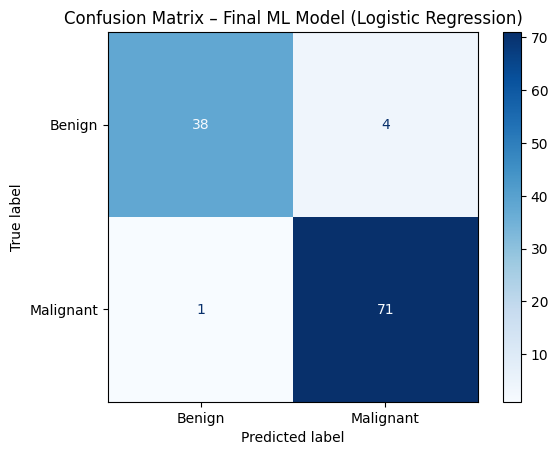

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions
y_pred_final = best_lr.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Benign", "Malignant"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Final ML Model (Logistic Regression)")
plt.show()


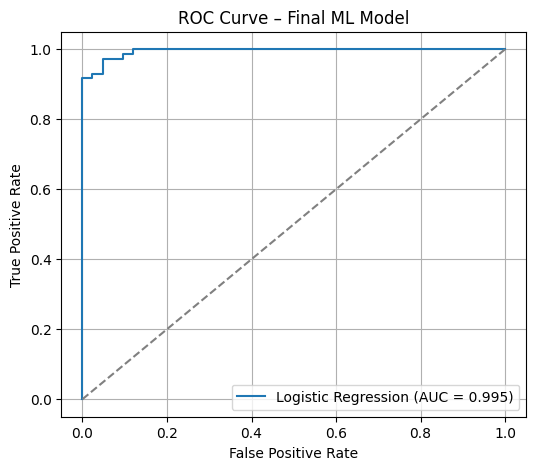

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilities
y_prob_final = best_lr.predict_proba(X_test_scaled)[:, 1]

# ROC values
fpr, tpr, _ = roc_curve(y_test, y_prob_final)
roc_auc = roc_auc_score(y_test, y_prob_final)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Final ML Model")
plt.legend()
plt.grid()
plt.show()


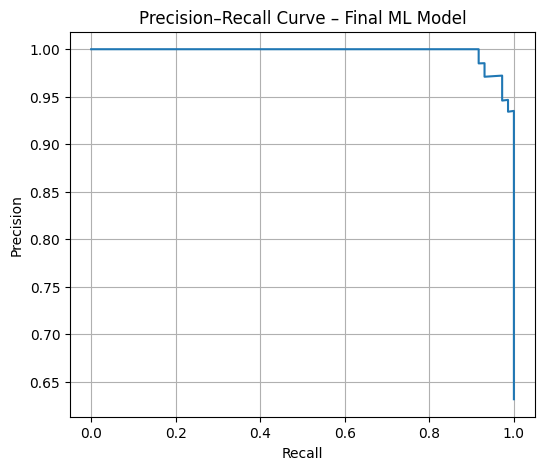

In [55]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob_final)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Final ML Model")
plt.grid()
plt.show()
